# Visualization Notebook

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys

In [9]:
sys.path.append('../GA_2021_05_17/')
from Prepare_Data_Functions import load_df, subtract_baseline, normalize_df, delete_rows
sys.path.append('../GP_BUCB_2021_05_19/')

In [10]:
TARGET = load_df(r'target_spectra.xlsx')
TARGET = subtract_baseline(TARGET, 'A2')
TARGET = normalize_df(TARGET)
TARGET = TARGET.drop(['A2'], axis = 1)
TARGET = np.array(TARGET)

wavelength = TARGET[:,0]
TARGET = TARGET[:,1]

In [11]:
def plot_batch(Results, actions, wavelength, target, batch_num):
    
    fig, ax = plt.subplots(figsize=(8,6), nrows=1, ncols=1)
    fontsize = 16
    
    # formatting loop
    ax.tick_params(direction='out', width=2, length=8)
    ax.tick_params(direction='out', which='minor', width=1, length=5)
    ax.set_yticks([])
        
    ax.set_xticks(np.arange(300, 801, 50))
    ax.tick_params(axis='x', labelsize=fontsize+2)
    ax.set_xlabel("Wavelength", fontsize=fontsize+6)

    # target
    ax.plot(wavelength, target, 'k-', linewidth=3, label="Target")
    for i, spectrum in enumerate(Results):
        # normalize
        action = actions[i]
        action = action / np.sum(action)
        spectrum = spectrum - np.min(spectrum)
        spectrum = spectrum/np.max(spectrum)
        ax.plot(wavelength, spectrum, '-', c=action, alpha=0.4)
        
    # setting legend as batch label
    legend = ax.legend([f'Batch {batch_num}'], fontsize=fontsize+4, handlelength=0,
                        handletextpad=0, fancybox=True,)
    for item in legend.legendHandles:
        item.set_visible(False)

    plt.subplots_adjust(hspace=0.0, wspace=0.05)
    plt.show()

In [22]:
%%javascript
 IPython.OutputArea.prototype._should_scroll = function(lines) {
   return false;
 }

<IPython.core.display.Javascript object>

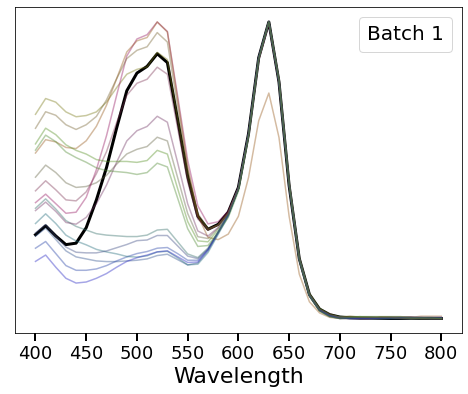

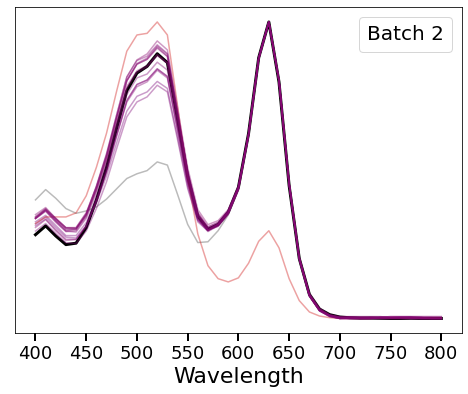

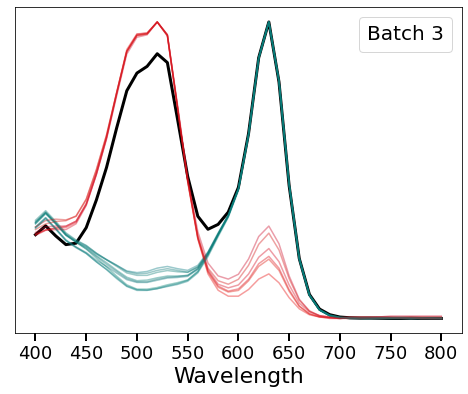

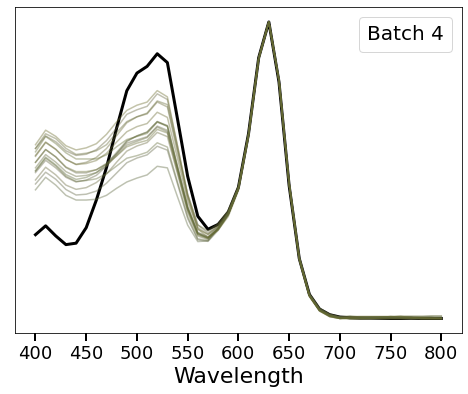

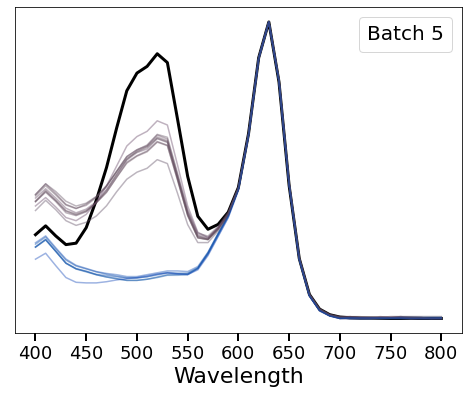

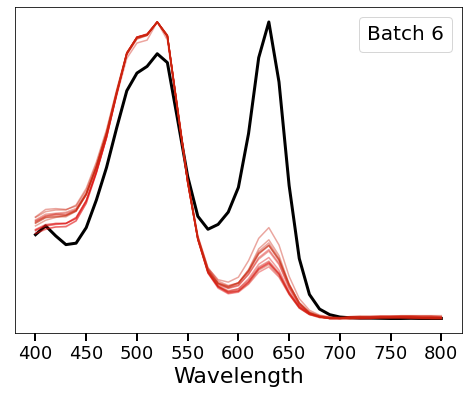

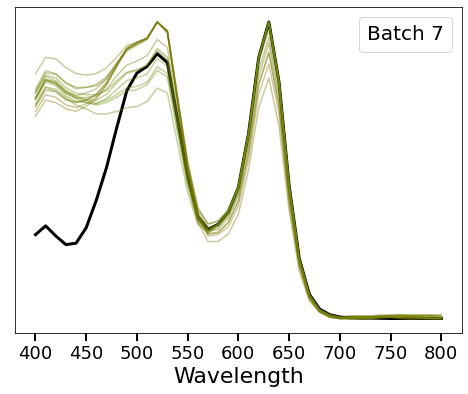

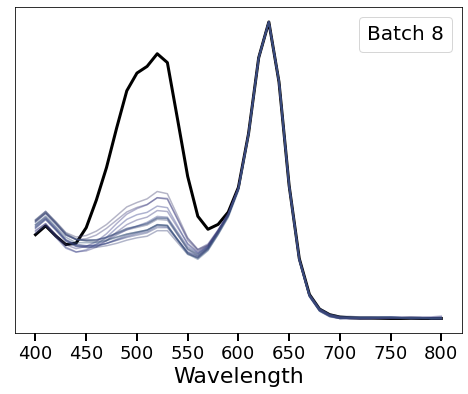

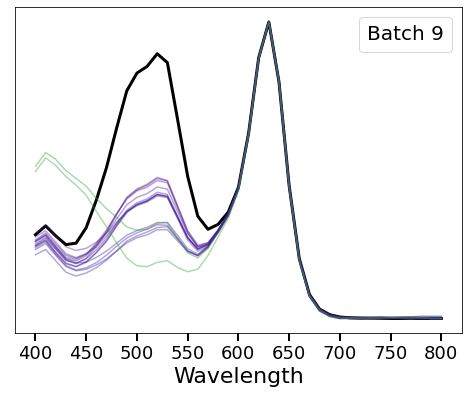

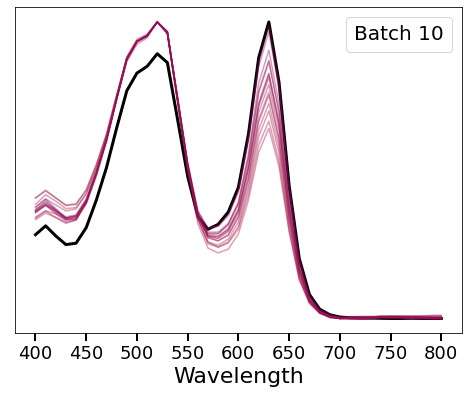

In [23]:
for i in range(1,11):
    Results = pd.read_excel(f'Iteration_{i}.xlsx')
    actions = pd.read_csv(f'Batch_{i}.csv')
     
    Results = np.array(Results)
    wavelength = Results[:,0].T
    Results = Results[:,1:].T

    # 'red-stock', 'green-stock', 'blue-stock'
    actions = actions.iloc[:, 0:3]
    actions = np.array(actions)
    
    plot_batch(Results[:-1], actions, wavelength, TARGET, i)